In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import os

In [13]:
x = pd.read_csv('fer2013.csv')
print (x.values.shape)

(35887, 3)


In [14]:
x.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [15]:
y = x.values[:,0]
pixels = x.values[:, 1]
print (type(pixels))
print (len(pixels))
print (len(pixels[0]))
print (pixels[10][10])

<class 'numpy.ndarray'>
35887
8287
3


In [16]:
p = pixels[10].split(' ')
print(len(p))

2304


In [17]:
X = np.zeros((pixels.shape[0], 48*48))

for ix in range(X.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])

In [18]:
temp = X


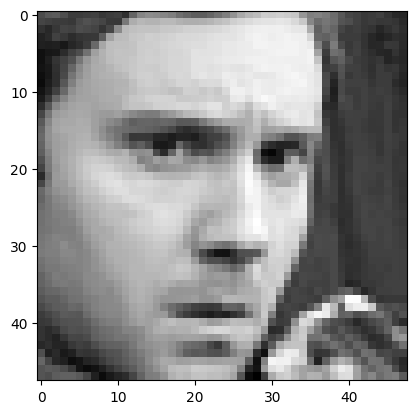

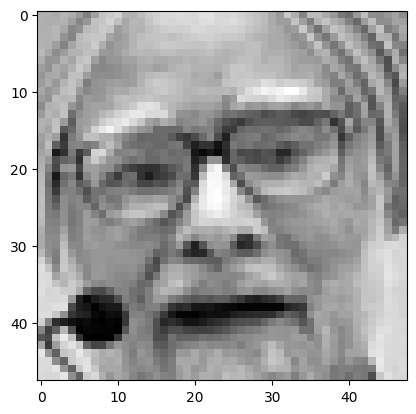

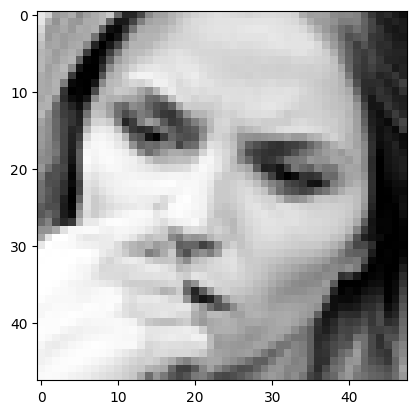

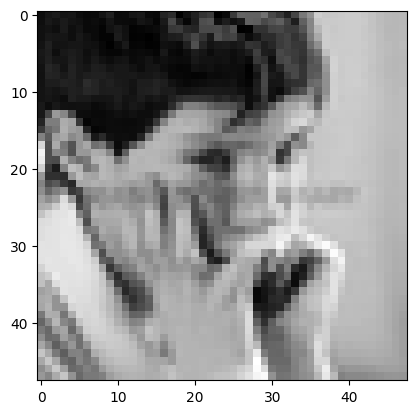

In [19]:
for ix in range(4):
    plt.figure(ix)
    plt.imshow(temp[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [20]:
X

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [21]:
y


array([0, 0, 2, ..., 0, 3, 2], dtype=object)

In [22]:
X=X/255

In [23]:
X_train = X[0:30000, :]
Y_train = y[0:30000]
print (X_train.shape, Y_train.shape)

X_test = X[30000:32300,:]
Y_test = y[30000:32300]
print (X_test.shape, Y_test.shape)

(30000, 2304) (30000,)
(2300, 2304) (2300,)


In [24]:
X_train = X_train.reshape((X_train.shape[0], 48, 48,1 ))
X_test  = X_test.reshape((X_test.shape[0], 48, 48,1))

In [25]:
Y_train = to_categorical(Y_train)
Y_test  = to_categorical(Y_test)
print(Y_train.shape)
print(Y_test.shape)

(30000, 7)
(2300, 7)


In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [28]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.22))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam' ,
              metrics=['acc'])

print(model.summary())

c:\Users\Oana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,441,223 (5.50 MB)

 Trainable params: 1,441,223 (5.50 MB)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(
        learning_rate=0.001,    # Înlocuiește 'lr' cu 'learning_rate'
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-7
    ),
    metrics=['accuracy']        # Opțional: Înlocuiește 'acc' cu 'accuracy'
)

In [31]:
batch_size = 64
epochs = 40


In [32]:
history = model.fit(X_train, Y_train, 
                    batch_size=batch_size,
                    validation_data=(X_test, Y_test),
                    epochs = epochs,
                    shuffle=True, 
                    verbose = 2)

Epoch 1/40
469/469 - 80s - 170ms/step - accuracy: 0.2483 - loss: 1.8229 - val_accuracy: 0.2561 - val_loss: 1.8104
Epoch 2/40
469/469 - 86s - 184ms/step - accuracy: 0.3245 - loss: 1.6820 - val_accuracy: 0.4117 - val_loss: 1.5294
Epoch 3/40
469/469 - 89s - 190ms/step - accuracy: 0.4055 - loss: 1.5219 - val_accuracy: 0.4574 - val_loss: 1.4245
Epoch 4/40
469/469 - 91s - 194ms/step - accuracy: 0.4543 - loss: 1.4127 - val_accuracy: 0.5009 - val_loss: 1.2965
Epoch 5/40
469/469 - 89s - 190ms/step - accuracy: 0.4860 - loss: 1.3365 - val_accuracy: 0.5343 - val_loss: 1.2338
Epoch 6/40
469/469 - 91s - 195ms/step - accuracy: 0.5087 - loss: 1.2866 - val_accuracy: 0.5465 - val_loss: 1.2043
Epoch 7/40
469/469 - 90s - 192ms/step - accuracy: 0.5302 - loss: 1.2375 - val_accuracy: 0.5383 - val_loss: 1.1956
Epoch 8/40
469/469 - 92s - 196ms/step - accuracy: 0.5404 - loss: 1.2081 - val_accuracy: 0.5639 - val_loss: 1.1517
Epoch 9/40
469/469 - 96s - 205ms/step - accuracy: 0.5521 - loss: 1.1807 - val_accuracy: 

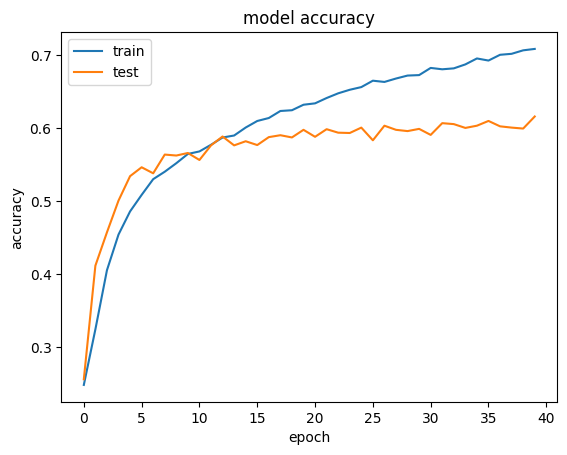

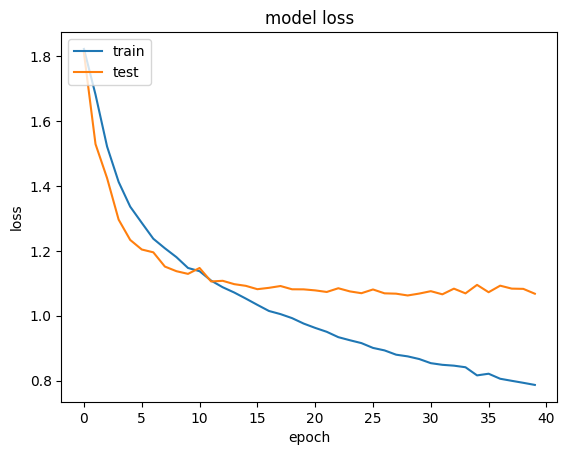

In [35]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
model.save('emotion_detection_model.h5')

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# 1. Încărcare set de date FER2013
df = pd.read_csv('fer2013.csv')
print("Forma setului de date:", df.shape)

# Coloana 'emotion' (sau 'label') și coloana 'pixels'
labels = df['emotion'].values  # depinde cum se numește coloana; unii folosesc "emotion", alții "label"
pixels = df['pixels'].values   # la tine s-ar putea numi direct "pixels"

# 2. Transformare string -> imagine
#   Vom redimensiona la 224x224 și vom replica canalul de gri în 3 canale
X_data = []
for px_str in pixels:
    # px_str este ceva de genul: "70 80 82 ... 79"
    px_list = px_str.split()
    px_arr  = np.array(px_list, dtype='float32')
    # reshape la 48x48 (grayscale)
    img_48  = px_arr.reshape((48,48))

    # redimensionare la 224x224
    img_224 = cv2.resize(img_48, (224, 224), interpolation=cv2.INTER_AREA)

    # replicare în 3 canale (B, G, R)
    img_224_3ch = cv2.merge([img_224, img_224, img_224])

    X_data.append(img_224_3ch)

X_data = np.array(X_data, dtype='float32')
print("X_data shape:", X_data.shape)  # (n_samples, 224, 224, 3)

# Normalizare la [0, 1] sau putem folosi direct preprocess_input mai încolo
X_data = X_data / 255.0

# 3. Împărțire train / val / test
#   FER2013 are, de obicei, un split default 'Training', 'PublicTest', 'PrivateTest' în coloana 'Usage'.
#   Dacă vrei alt split, îl poți face manual. În exemplu, vom folosi 'Training' pentru antrenare și
#   'PublicTest' pentru validare, 'PrivateTest' pentru test final.

train_idx = df['Usage'] == 'Training'
val_idx   = df['Usage'] == 'PublicTest'
test_idx  = df['Usage'] == 'PrivateTest'

X_train = X_data[train_idx]
y_train = labels[train_idx]

X_val   = X_data[val_idx]
y_val   = labels[val_idx]

X_test  = X_data[test_idx]
y_test  = labels[test_idx]

# 4. One-hot encoding la etichete
num_classes = 7  # FER2013 are 7 clase
y_train_oh = to_categorical(y_train, num_classes)
y_val_oh   = to_categorical(y_val,   num_classes)
y_test_oh  = to_categorical(y_test,  num_classes)

print("X_train, y_train_oh:", X_train.shape, y_train_oh.shape)
print("X_val,   y_val_oh:  ", X_val.shape,   y_val_oh.shape)
print("X_test,  y_test_oh: ", X_test.shape,  y_test_oh.shape)

# 5. Data augmentation (opțional - dar de multe ori ajută mult)
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input  # ResNet are nevoie de preprocess_input
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Apelăm flow pentru a crea generatori
batch_size = 32

train_generator = train_datagen.flow(
    X_train, y_train_oh,
    batch_size=batch_size,
    shuffle=True
)

val_generator = val_datagen.flow(
    X_val, y_val_oh,
    batch_size=batch_size,
    shuffle=False
)

# 6. Crearea modelului cu Transfer Learning (ResNet50)
#    a) Încărcăm ResNet50 pre-antrenat pe ImageNet, fără top (include_top=False)
#    b) Adăugăm un cap (head) final pentru cele 7 clase

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Congelăm layerele de bază (cel puțin la început)
for layer in base_model.layers:
    layer.trainable = False

# Adăugăm layerele de clasificare
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 7. Compilăm modelul
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

# 8. Antrenare - faza 1 (antrenăm doar clasificadorul adăugat)
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1
)

# 9. Faza 2 (opțional): decongelăm o parte dintre layerele adânci din ResNet50 și le antrenăm cu un lr mai mic.
#    Asta îți poate ridica considerabil acuratețea, dar e nevoie de mai mult timp de antrenare.

for layer in base_model.layers[-10:]:  # de exemplu, deblocăm ultimele 10 layere
    layer.trainable = True

# Recompilăm cu un learning rate mai mic
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-5),
    metrics=['accuracy']
)

epochs_fine_tune = 10
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs_fine_tune,
    verbose=1
)

# 10. Evaluare pe setul de test
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator = test_datagen.flow(
    X_test, y_test_oh,
    batch_size=batch_size,
    shuffle=False
)

scores = model.evaluate(test_generator, verbose=1)
print("Loss pe test:", scores[0])
print("Accuracy pe test:", scores[1])


Forma setului de date: (35887, 3)
X_data shape: (35887, 224, 224, 3)
X_train, y_train_oh: (28709, 224, 224, 3) (28709, 7)
X_val,   y_val_oh:   (3589, 224, 224, 3) (3589, 7)
X_test,  y_test_oh:  (3589, 224, 224, 3) (3589, 7)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,640,391 (94.00 MB)

 Trainable params: 1,052,679 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

c:\Users\Oana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2256 - loss: 1.8963

c:\Users\Oana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 1244s 1s/step - accuracy: 0.2257 - loss: 1.8962 - val_accuracy: 0.2494 - val_loss: 1.8127
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1247s 1s/step - accuracy: 0.2518 - loss: 1.8180 - val_accuracy: 0.2494 - val_loss: 1.8103
Epoch 3/10
313/898 ━━━━━━━━━━━━━━━━━━━━ 12:01 1s/step - accuracy: 0.2473 - loss: 1.8241

KeyboardInterrupt: 

In [6]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Încărcare set de date FER2013
df = pd.read_csv('fer2013.csv')
print("Forma setului de date:", df.shape)

# 2. Preluare labels și pixels
labels = df['emotion'].values  # Verifică dacă e 'emotion' sau 'label'
pixels = df['pixels'].values

# 3. Transformare string -> imagine 48x48 grayscale
X_data = []
for px_str in pixels:
    px_list = px_str.split()
    px_arr  = np.array(px_list, dtype='float32')
    img_48  = px_arr.reshape((48,48))
    X_data.append(img_48)

X_data = np.array(X_data, dtype='float32')
print("X_data shape:", X_data.shape)  # (n_samples, 48, 48)

# Normalizare la [0,1]
X_data = X_data / 255.0

# Adăugăm canalul de culoare (1)
X_data = np.expand_dims(X_data, axis=-1)  # (n_samples, 48, 48, 1)

# 4. Împărțire train/val/test
train_idx = (df['Usage'] == 'Training')
val_idx   = (df['Usage'] == 'PublicTest')
test_idx  = (df['Usage'] == 'PrivateTest')

X_train = X_data[train_idx]
y_train = labels[train_idx]

X_val   = X_data[val_idx]
y_val   = labels[val_idx]

X_test  = X_data[test_idx]
y_test  = labels[test_idx]

# 5. One-hot encoding
num_classes = 7
y_train_oh = to_categorical(y_train, num_classes)
y_val_oh   = to_categorical(y_val,   num_classes)
y_test_oh  = to_categorical(y_test,  num_classes)

print(f"X_train: {X_train.shape}, y_train_oh: {y_train_oh.shape}")
print(f"X_val:   {X_val.shape},   y_val_oh:   {y_val_oh.shape}")
print(f"X_test:  {X_test.shape},  y_test_oh:  {y_test_oh.shape}")

# 6. Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator()

batch_size = 64

train_generator = train_datagen.flow(
    X_train, y_train_oh,
    batch_size=batch_size,
    shuffle=True
)
val_generator = val_datagen.flow(
    X_val, y_val_oh,
    batch_size=batch_size,
    shuffle=False
)

# 7. Definire model (stil VGG-ish)
model = Sequential()

# Bloc 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2)))  # scade la 24x24

# Bloc 2
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2)))  # scade la 12x12

# Bloc 3
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2)))  # scade la 6x6

# Bloc 4
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2)))  # scade la 3x3

# Flatten la final
model.add(Flatten())  # 3x3x256 => 2304 neuroni

# FC1
model.add(Dense(512))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.5))

# FC2
model.add(Dense(256))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.5))

# Output
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 8. Antrenare
epochs = 120  # poți crește la 40-50 dacă ai GPU și timp
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1
)

# 9. Evaluare pe test
test_loss, test_acc = model.evaluate(X_test, y_test_oh, verbose=1)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

# 10. Salvare model (opțional)
model.save("model_emotion_vggish.h5")


Forma setului de date: (35887, 3)
X_data shape: (35887, 48, 48)
X_train: (28709, 48, 48, 1), y_train_oh: (28709, 7)
X_val:   (3589, 48, 48, 1),   y_val_oh:   (3589, 7)
X_test:  (3589, 48, 48, 1),  y_test_oh:  (3589, 7)


c:\Users\Andrei\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_30 (ReLU)                 │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_31 (ReLU)                 │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_32 (ReLU)                 │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_33 (ReLU)                 │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_34 (ReLU)                 │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_35 (ReLU)                 │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 6, 6, 256)      │       590,08

 Total params: 3,646,407 (13.91 MB)

 Trainable params: 3,642,055 (13.89 MB)

 Non-trainable params: 4,352 (17.00 KB)

Epoch 1/150


c:\Users\Andrei\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 177ms/step - accuracy: 0.1748 - loss: 2.4189 - val_accuracy: 0.2360 - val_loss: 1.8267
Epoch 2/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 180ms/step - accuracy: 0.2249 - loss: 2.0700 - val_accuracy: 0.2731 - val_loss: 1.8109
Epoch 3/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 80s 177ms/step - accuracy: 0.2324 - loss: 1.9727 - val_accuracy: 0.2931 - val_loss: 1.7505
Epoch 4/150
199/449 ━━━━━━━━━━━━━━━━━━━━ 43s 174ms/step - accuracy: 0.2459 - loss: 1.8941

KeyboardInterrupt: 